In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib widget
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
data = pd.read_csv("/mnt/Data/code/machine_learning/course/intro_to_ML/intro_to_ML/project/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Remove CUST_ID, as it have no effect on the model.

In [4]:
data.drop(columns=["CUST_ID"], inplace=True)

Handle the missing values

In [5]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Two columns: **MINIMUM_PAYMENTS** and **CREDIT_LIMIT** has missing values.

|Column|Missing Numbers|
|-----------|--------------------------|
|**MININUM_PAYMENTS**|313|
|**CREDIT_LIMIT**|1|

In [6]:
print(data["CREDIT_LIMIT"].value_counts())
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mode()[0], inplace=True)

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64


Missing value in **CREDIT_LIMIT** is replaced using the mode of values because its values are not continuous values and there exisit only certain number of credit limit.

In [7]:
print(data["MINIMUM_PAYMENTS"].value_counts())
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


Missing values of **MINIMUM_PAYMENT** is replaced with the mean of the values because its values are continuous.

In [8]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
len(data)

8950

Detect skewness in data

BALANCE: yes
BALANCE_FREQUENCY: yes
PURCHASES: yes
ONEOFF_PURCHASES: yes
INSTALLMENTS_PURCHASES: yes
CASH_ADVANCE: yes
PURCHASES_FREQUENCY: no
ONEOFF_PURCHASES_FREQUENCY: yes
PURCHASES_INSTALLMENTS_FREQUENCY: no
CASH_ADVANCE_FREQUENCY: yes
CASH_ADVANCE_TRX: yes
PURCHASES_TRX: yes
CREDIT_LIMIT: yes
PAYMENTS: yes
MINIMUM_PAYMENTS: yes
PRC_FULL_PAYMENT: yes
TENURE: yes


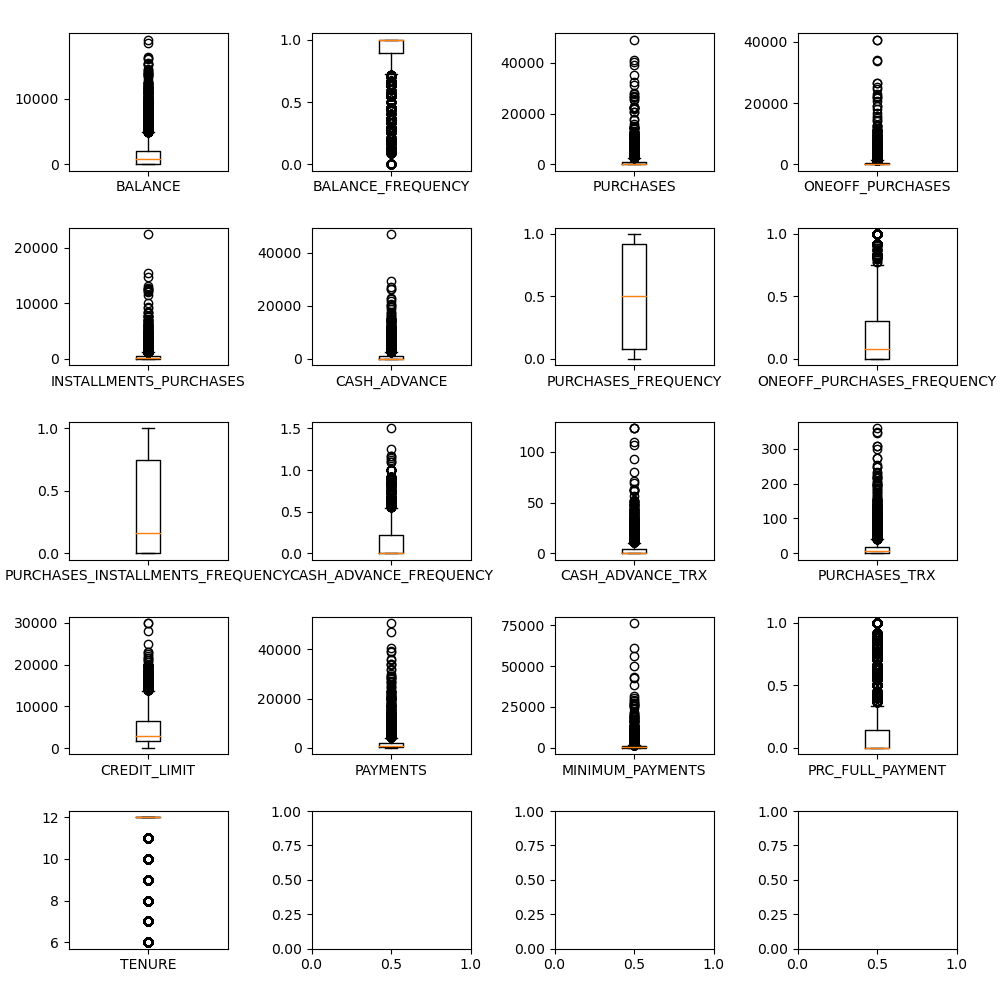

In [10]:
columns = data.columns
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.boxplot(data[column], labels=[column])

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    if data[(data[column] > upper) | (data[column] < lower)].any(axis=None):
        print(f"{column}: yes")
    else:
        print(f"{column}: no")
plt.show()


In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.hist(data[column])
    ax.set_title(column)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

data_log = log_transformer.transform(data)
data_log = pd.DataFrame(data_log, columns=columns)
data_log

/home/aung/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,6.762968,0.000000,1.945910
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910


BALANCE: yes
BALANCE_FREQUENCY: yes
PURCHASES: no
ONEOFF_PURCHASES: no
INSTALLMENTS_PURCHASES: no
CASH_ADVANCE: no
PURCHASES_FREQUENCY: no
ONEOFF_PURCHASES_FREQUENCY: yes
PURCHASES_INSTALLMENTS_FREQUENCY: no
CASH_ADVANCE_FREQUENCY: yes
CASH_ADVANCE_TRX: yes
PURCHASES_TRX: no
CREDIT_LIMIT: yes
PAYMENTS: yes
MINIMUM_PAYMENTS: yes
PRC_FULL_PAYMENT: yes
TENURE: yes


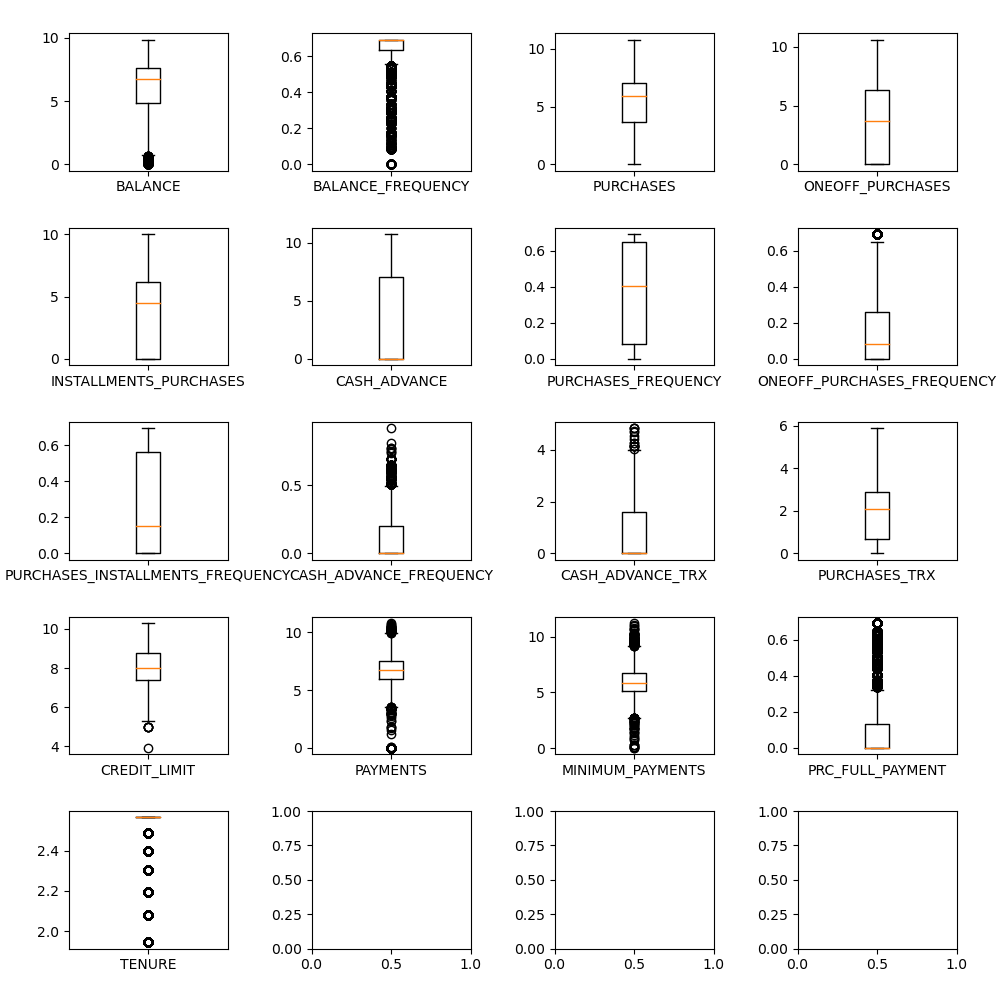

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.boxplot(data_log[column], labels=[column])

    Q1 = data_log[column].quantile(0.25)
    Q3 = data_log[column].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    if data_log[(data_log[column] > upper) | (data_log[column] < lower)].any(axis=None):
        print(f"{column}: yes")
    else:
        print(f"{column}: no")
plt.show()


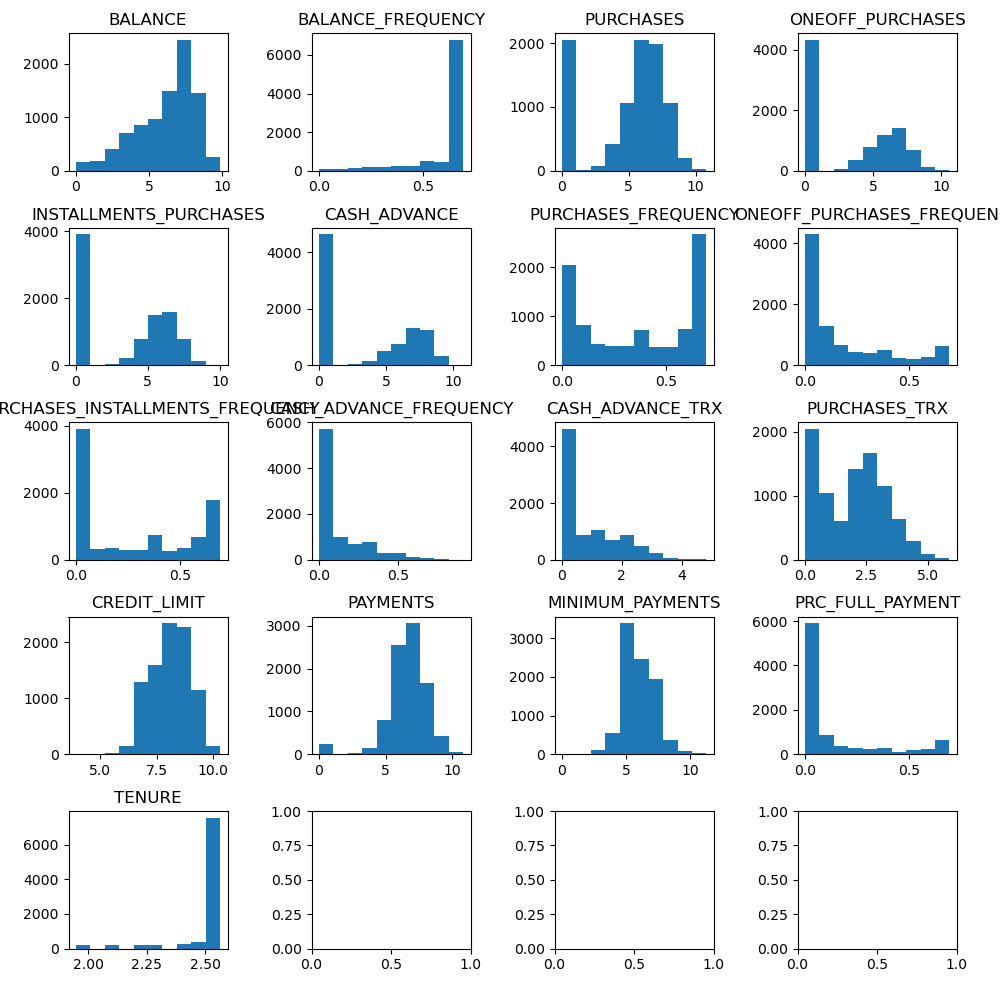

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
fig.tight_layout(pad=2.0)

for column, ax in zip(columns, axs.flat):
    ax.hist(data_log[column])
    ax.set_title(column)

Detect Correlation among features

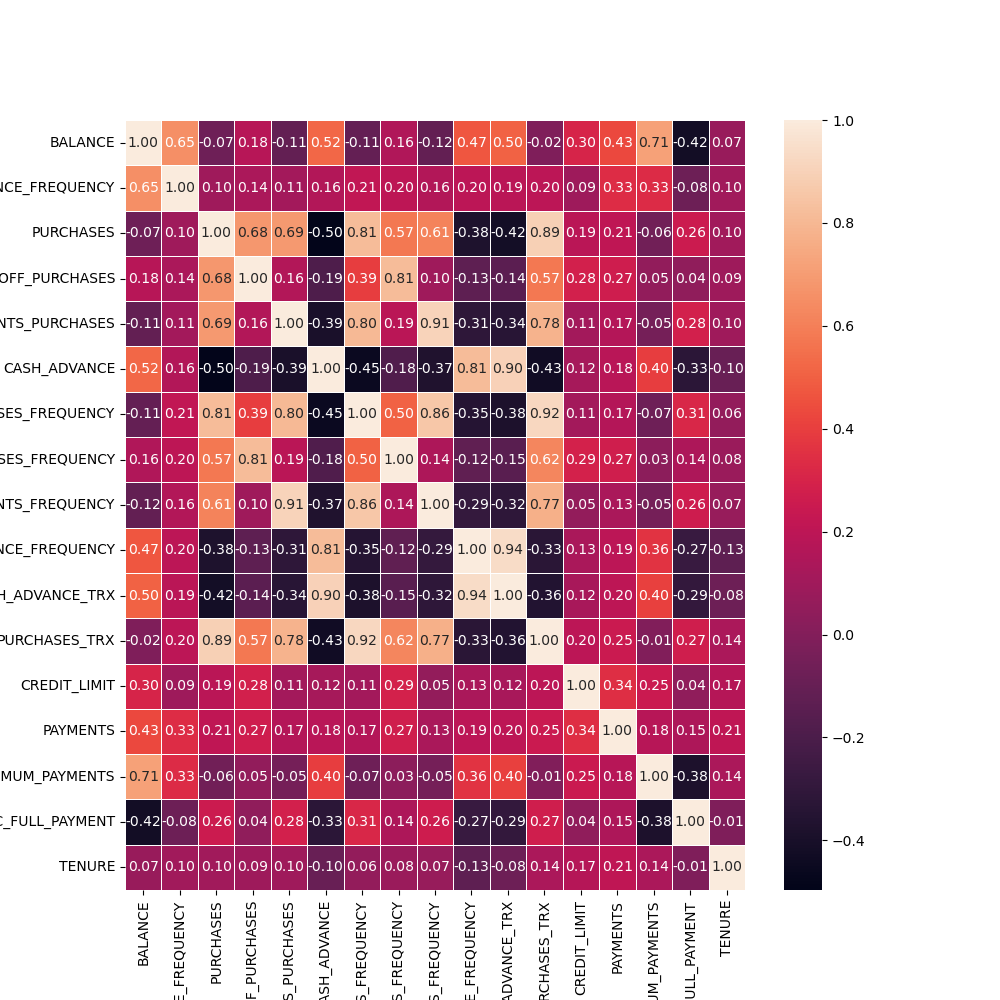

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_log.corr(), annot=True, linewidths=0.6, fmt=".2f")
plt.show()

Reduce the dimensions

In [ ]:
pca = PCA()
pca.fit(data_log)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

5

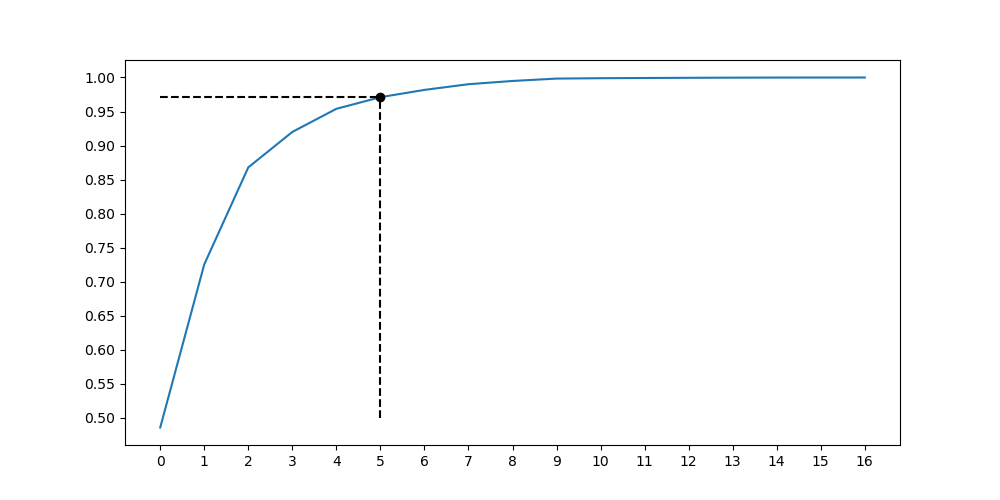

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumsum)
plt.plot([0, d], [cumsum[d], cumsum[d]], "k--")
plt.plot([d, d], [0.5, cumsum[d]], "k--")
plt.plot(d, cumsum[d], "ko")
plt.xticks(np.arange(0, 17, 1))
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.show()

In [ ]:
pca = PCA(n_components=5)
data_log_reduced = pca.fit_transform(data_log)
data_log_reduced.shape


(8950, 5)

In [ ]:
random_states = [10, 20, 30, 40, 50]
num_clusters = range(1, 20)
inertia_history = dict()

for k in num_clusters:
    inertia = list()
    for rs in random_states:
        kmeans = KMeans(n_clusters=k, random_state=rs)
        kmeans.fit(data_log_reduced)
        inertia.append(kmeans.inertia_)
    avg_inertia = np.mean(inertia)
    inertia_history[k] = avg_inertia


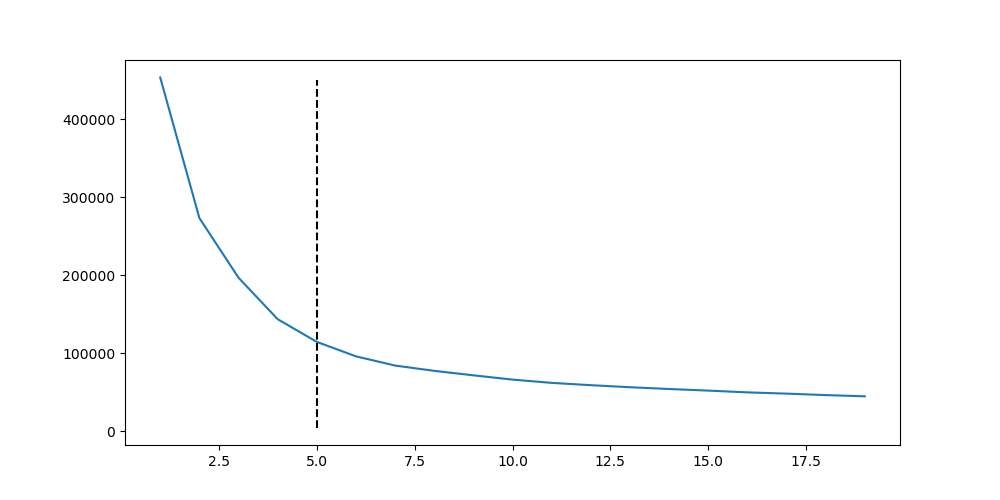

In [ ]:
x = list(inertia_history.keys())
y = list(inertia_history.values())
kneedle = KneeLocator(x, y, curve="convex", direction="decreasing")
num_cluster = kneedle.elbow

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.plot([num_cluster, num_cluster], [5000, 450000], "k--")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
y_pred = kmeans.fit_predict(data_log_reduced).reshape(-1, 1)

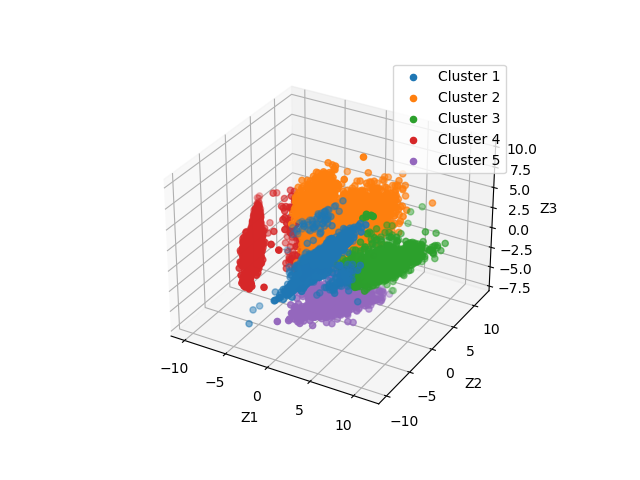

In [ ]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(data_log)
X = np.concatenate([X_reduced, y_pred], axis=1)

fig = plt.figure()
ax = plt.axes(projection="3d")
colors = list(mcolors.TABLEAU_COLORS.keys())
for k in range(num_cluster):
    rows = np.where(X[:, 3] == k)
    ax.scatter3D(X[rows][:, 0], X[rows][:, 1], X[rows][:, 2], label=f"Cluster {k+1}", color=colors[k])
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend()
plt.show()

In [ ]:
X = np.concatenate([data, y_pred], axis=1)
result = pd.DataFrame(X, columns=columns.tolist() + ["Cluster"]).groupby("Cluster")

People with average to high credit limit who make all type of purchases.

In [47]:
result.get_group(0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.0,0.166667,0.0,0.083333,0.0,0.0,2.0,1000.0,201.802084,139.509787,0.00,12.0,0.0
5,1809.828751,1.000000,1333.28,0.0,1333.28,0.0,0.666667,0.0,0.583333,0.0,0.0,8.0,1800.0,1400.057770,2407.246035,0.00,12.0,0.0
7,1823.652743,1.000000,436.20,0.0,436.20,0.0,1.000000,0.0,1.000000,0.0,0.0,12.0,2300.0,679.065082,532.033990,0.00,12.0,0.0
10,1293.124939,1.000000,920.12,0.0,920.12,0.0,1.000000,0.0,1.000000,0.0,0.0,12.0,1200.0,1083.301007,2172.697765,0.00,12.0,0.0
17,41.089489,0.454545,519.00,0.0,519.00,0.0,0.416667,0.0,0.333333,0.0,0.0,8.0,2500.0,254.590662,73.203221,0.25,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.0,591.24,0.0,1.000000,0.0,0.833333,0.0,0.0,6.0,1000.0,475.523262,82.771320,1.00,6.0,0.0
8942,40.829749,1.000000,113.28,0.0,113.28,0.0,1.000000,0.0,0.833333,0.0,0.0,6.0,1000.0,94.488828,86.283101,0.25,6.0,0.0
8945,28.493517,1.000000,291.12,0.0,291.12,0.0,1.000000,0.0,0.833333,0.0,0.0,6.0,1000.0,325.594462,48.886365,0.50,6.0,0.0
8946,19.183215,1.000000,300.00,0.0,300.00,0.0,1.000000,0.0,0.833333,0.0,0.0,6.0,1000.0,275.861322,864.206542,0.00,6.0,0.0


People with due payments who take advance cash more often.

In [48]:
result.get_group(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4.0,11.0,8000.0,1993.439277,2109.906490,0.0,12.0,1.0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6.0,92.0,11250.0,2077.959051,1659.775075,0.0,12.0,1.0
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13.0,13.0,9000.0,9479.043842,1425.426525,0.0,12.0,1.0
26,1615.967240,1.000000,102.00,102.00,0.00,244.840485,0.166667,0.166667,0.000000,0.250000,5.0,2.0,1700.0,890.178845,971.183209,0.0,12.0,1.0
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16.0,8.0,10500.0,1601.448347,1648.851345,0.0,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8898,379.288635,0.714286,550.00,50.00,500.00,388.818230,0.571429,0.142857,0.571429,0.142857,2.0,6.0,500.0,509.404913,531.988210,0.0,7.0,1.0
8912,376.547421,0.857143,520.00,280.00,240.00,1178.402416,0.857143,0.142857,0.714286,0.714286,9.0,7.0,1000.0,929.415656,103.927887,0.2,7.0,1.0
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16.0,6.0,1000.0,143.118373,85.152441,0.0,6.0,1.0
8933,735.652303,1.000000,619.60,255.62,363.98,546.902403,1.000000,0.166667,0.833333,0.166667,5.0,16.0,1000.0,106.138603,337.294767,0.0,6.0,1.0


Less money spenders with average to high credit limits who purchases mostly in installments.

In [49]:
result.get_group(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,2.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.0,0.333333,0.083333,0.250000,0.0,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,2.0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0.0,26.0,3000.0,608.263689,490.207013,0.250000,12.0,2.0
13,921.693369,1.000000,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0.0,26.0,7500.0,1655.891435,251.137986,0.083333,12.0,2.0
18,1989.072228,1.000000,504.35,166.00,338.35,0.0,0.666667,0.083333,0.583333,0.0,0.0,9.0,13000.0,1720.837373,744.613395,0.000000,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,204.440114,1.000000,384.81,169.00,215.81,0.0,1.000000,0.142857,0.857143,0.0,0.0,8.0,1000.0,89.921689,100.913002,0.000000,7.0,2.0
8897,328.686581,1.000000,2806.78,2588.53,218.25,0.0,0.857143,0.714286,0.285714,0.0,0.0,26.0,1200.0,1796.886852,93.017466,0.250000,7.0,2.0
8903,466.723482,0.833333,947.21,498.01,449.20,0.0,0.833333,0.333333,0.666667,0.0,0.0,27.0,1500.0,38.775803,131.313627,0.000000,6.0,2.0
8923,486.661842,0.833333,1898.88,939.09,959.79,0.0,0.833333,0.666667,0.666667,0.0,0.0,24.0,1200.0,669.039640,336.880119,0.500000,6.0,2.0


People with high credit limit who take more cash in advance.

In [50]:
result.get_group(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3.0
14,2772.772734,1.000000,0.0,0.0,0.0,346.811390,0.0,0.0,0.0,0.083333,1.0,0.0,3000.0,805.647974,989.962866,0.000000,12.0,3.0
16,2072.074354,0.875000,0.0,0.0,0.0,2784.274703,0.0,0.0,0.0,0.250000,3.0,0.0,3000.0,391.974562,376.579631,0.000000,8.0,3.0
24,5368.571219,1.000000,0.0,0.0,0.0,798.949863,0.0,0.0,0.0,0.363636,4.0,0.0,6000.0,1422.726707,1657.002877,0.000000,11.0,3.0
35,1656.350781,1.000000,0.0,0.0,0.0,99.264367,0.0,0.0,0.0,0.083333,1.0,0.0,1800.0,351.500199,634.569311,0.000000,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,1055.087681,0.666667,0.0,0.0,0.0,1820.116200,0.0,0.0,0.0,0.333333,2.0,0.0,2000.0,54.795084,233.229870,0.000000,6.0,3.0
8929,371.527312,0.333333,0.0,0.0,0.0,1465.407927,0.0,0.0,0.0,0.166667,5.0,0.0,1500.0,0.000000,864.206542,0.000000,6.0,3.0
8937,163.001629,0.666667,0.0,0.0,0.0,274.440466,0.0,0.0,0.0,0.166667,3.0,0.0,1000.0,117.738787,60.792450,0.000000,6.0,3.0
8938,78.818407,0.500000,0.0,0.0,0.0,1113.186078,0.0,0.0,0.0,0.166667,7.0,0.0,1200.0,1397.770131,21.821194,0.333333,6.0,3.0


High spenders with high credit limit who make expensive purchases.

In [51]:
result.get_group(4)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0,4.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.0,12.0,4.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.0,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0,4.0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.0,12.0,4.0
11,630.794744,0.818182,1492.18,1492.18,0.0,0.000000,0.250000,0.250000,0.0,0.000000,0.0,6.0,2000.0,705.618627,155.549069,0.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,7.336804,0.333333,74.00,74.00,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0.0,1.0,3000.0,214.921009,44.254787,0.0,6.0,4.0
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.0,0.166667,2.0,2.0,1000.0,72.530037,110.950798,0.0,6.0,4.0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0.0,1.0,500.0,58.644883,43.473717,0.0,6.0,4.0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.0,0.000000,0.0,2.0,4000.0,0.000000,864.206542,0.0,6.0,4.0
